**AI MODEL**: FORECASTING PASSENGERS BASED ON HISTORICAL DATA




In [1]:
import os
os.environ["SHELL"] = "/bin/bash"

!pip install scikit-learn
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import data_loader
import data_processing
import visualization
import forecasting
import pandas as pd

In [3]:
data = data_loader.load_data("input/bus_bts.csv")
daily_passengers = data_processing.process_data(data)

if daily_passengers is None:
    raise ValueError("No data loaded")

Unique geton_time values: ['06:34:45' '06:34:58' '07:19:07' ... '06:01:32' '06:01:07' '06:01:37']
Filtered data size: (2409414, 13)
Daily passengers data:             passenger_count
geton_date                 
2019-09-01            24259
2019-09-02            44069
2019-09-03            47574
2019-09-04            42839
2019-09-05            48778
2019-09-06            43706
2019-09-07            18944
2019-09-08            23256
2019-09-09            45857
2019-09-10            51083
2019-09-11            48238
2019-09-12            23488
2019-09-13            15588
2019-09-14            20709
2019-09-15            23239
2019-09-16            48801
2019-09-17            50712
2019-09-18            49428
2019-09-19            49272
2019-09-20            47557
2019-09-21            23906
2019-09-22             7530
2019-09-23            47870
2019-09-24            49788
2019-09-25            49766
2019-09-26            48776
2019-09-27            48295
2019-09-28            32792
2019-

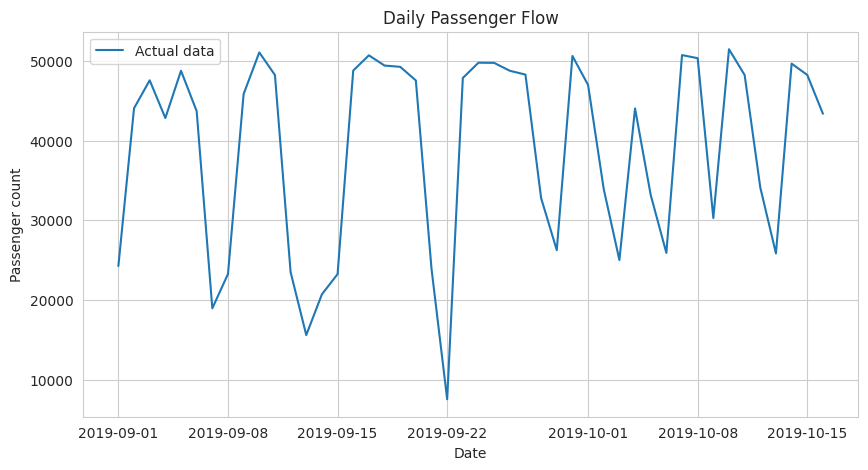

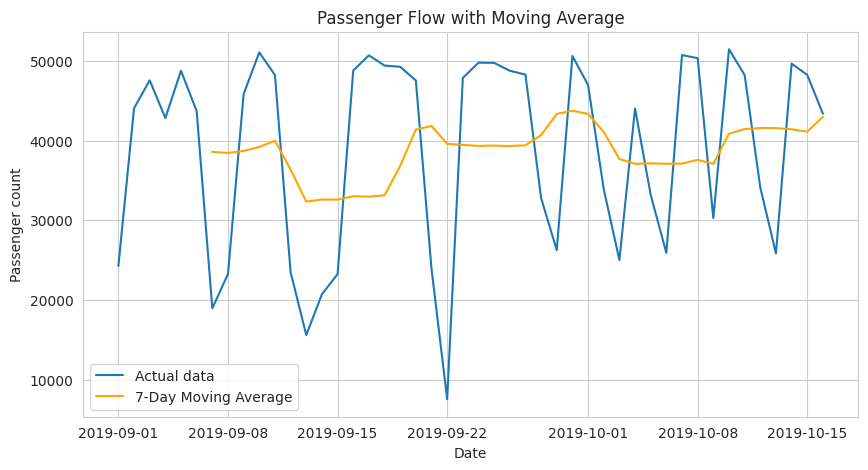

In [4]:
#визуализация потока пасс
visualization.visualize_passenger_flow(daily_passengers)

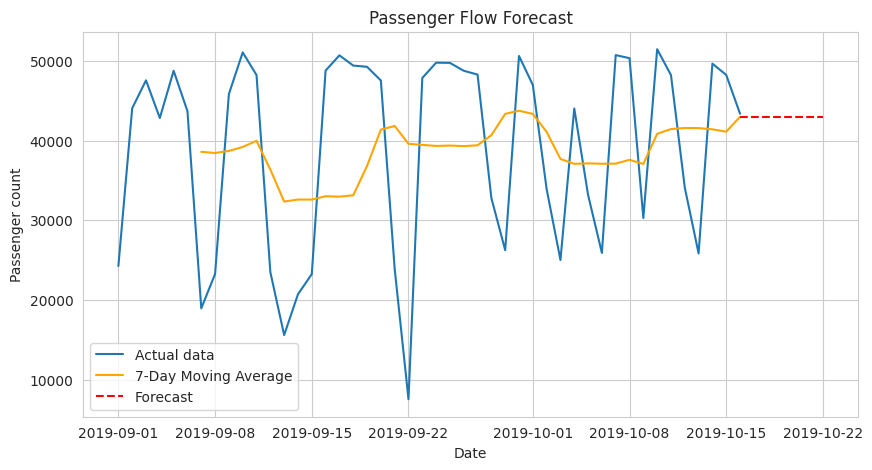

In [5]:
#форкаст потока пасс
forecast = forecasting.forecast_passenger_flow(daily_passengers)

#визуализация форкаста
plt.figure(figsize=(10, 5))
plt.plot(daily_passengers.index, daily_passengers['passenger_count'], label="Actual data")
plt.plot(daily_passengers.index, daily_passengers['moving_average'], label="7-Day Moving Average", color="orange")
plt.plot(forecast.index, forecast['forecast'], label="Forecast", color="red", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Passenger count")
plt.title("Passenger Flow Forecast")
plt.legend()
plt.show()

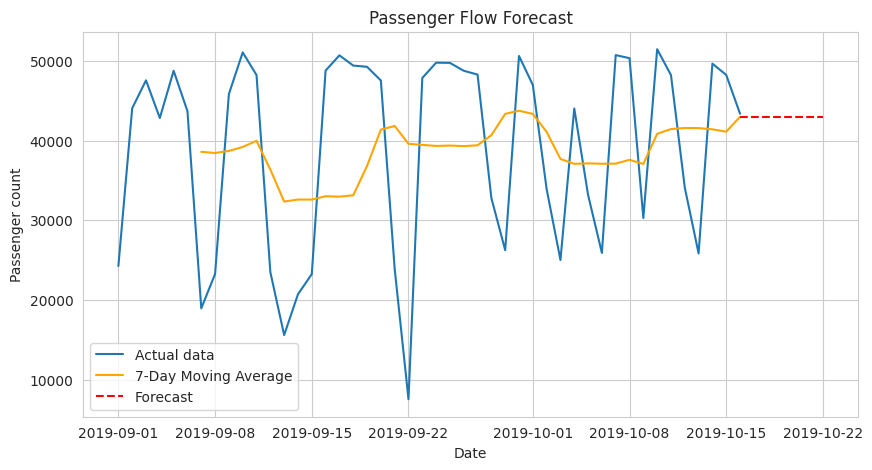

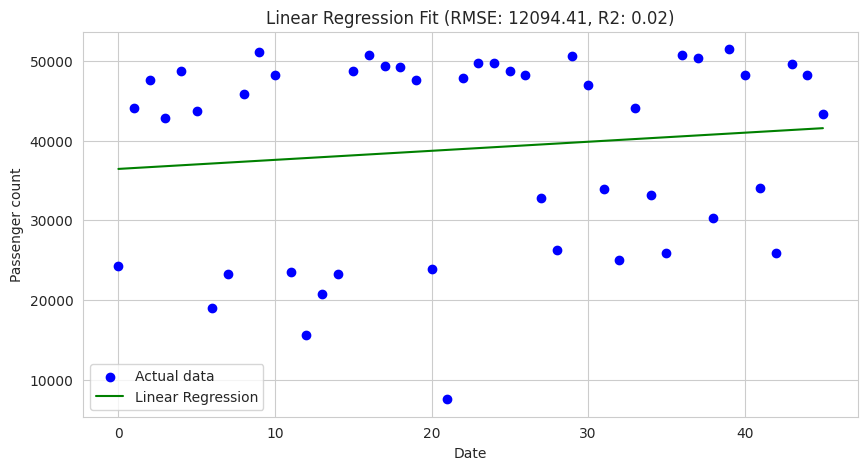

In [6]:
# Прогнозирование и визуализация регрессии
visualization.visualize_forecast_with_regression(daily_passengers, forecast)